# Домашнее задание по библиотеке NetworkX

In [1]:
import networkx as nx

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Задание 1 (1 балл)
Создайте граф и добавьте в него $5$ вершин с городами России, у каждой должен быть атрибут (характеристика) `time_diff`, означающий временную разницу с Москвой в часах.

In [3]:
fly_graph = nx.Graph()

fly_graph.add_node('Москва', time_diff = 0)
fly_graph.add_node('Новокузнецк', time_diff = 4)
fly_graph.add_node('Иркутск', time_diff = 5)
fly_graph.add_node('Волгоград', time_diff = 1)
fly_graph.add_node('Владивосток', time_diff = 7)

## Задание 2 (1 балл)
Выберите какую-нибудь конкретную авиакомпанию (Аэрофлот, S7, Utair, etc).

В созданный граф добавьте рёбра между выбранными $5$ю городами, между которыми есть авиарейсы данной компании. У каждого ребра должны быть следующие атрибуты:
- расстояние между городами в километрах `distance`
- время перелёта в минутах `time`

При желании можно добавить в граф также несколько городов, являющихся пересадочными пунктами.

(-1.0829574857858018,
 0.742107201501836,
 -0.9698138475648528,
 0.9581796174717916)

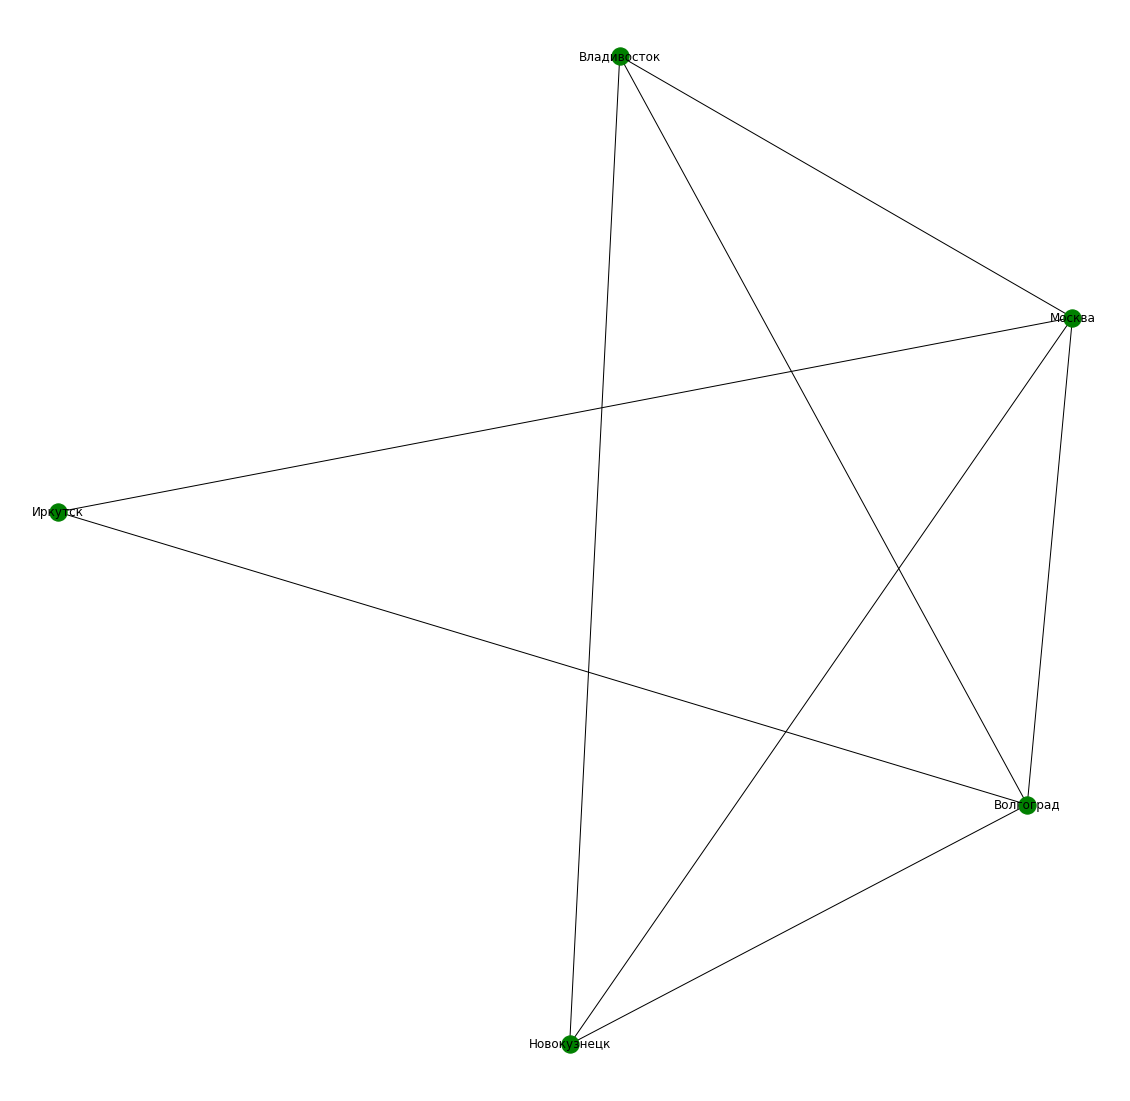

In [6]:
#Компания "Аэрофлот"
fly_graph.add_edge('Москва', 'Владивосток', distance = 6422, time = 495)
fly_graph.add_edge('Москва', 'Новокузнецк', distance = 3120, time = 265)
fly_graph.add_edge('Москва', 'Иркутск', distance = 4206, time = 350)
fly_graph.add_edge('Москва', 'Волгоград', distance = 913, time = 120)
fly_graph.add_edge('Новокузнецк', 'Волгоград', distance = 3120+913, time = 1240)
fly_graph.add_edge('Новокузнецк', 'Владивосток', distance = 3120+6422, time = 1245)
fly_graph.add_edge('Иркутск', 'Волгоград', distance = 4206+913, time = 1195)
fly_graph.add_edge('Владивосток', 'Волгоград', distance = 6422+913, time = 845)

plt.figure(figsize=(20, 20)) 
nx.draw_networkx(fly_graph, node_color='green')
plt.axis('off')

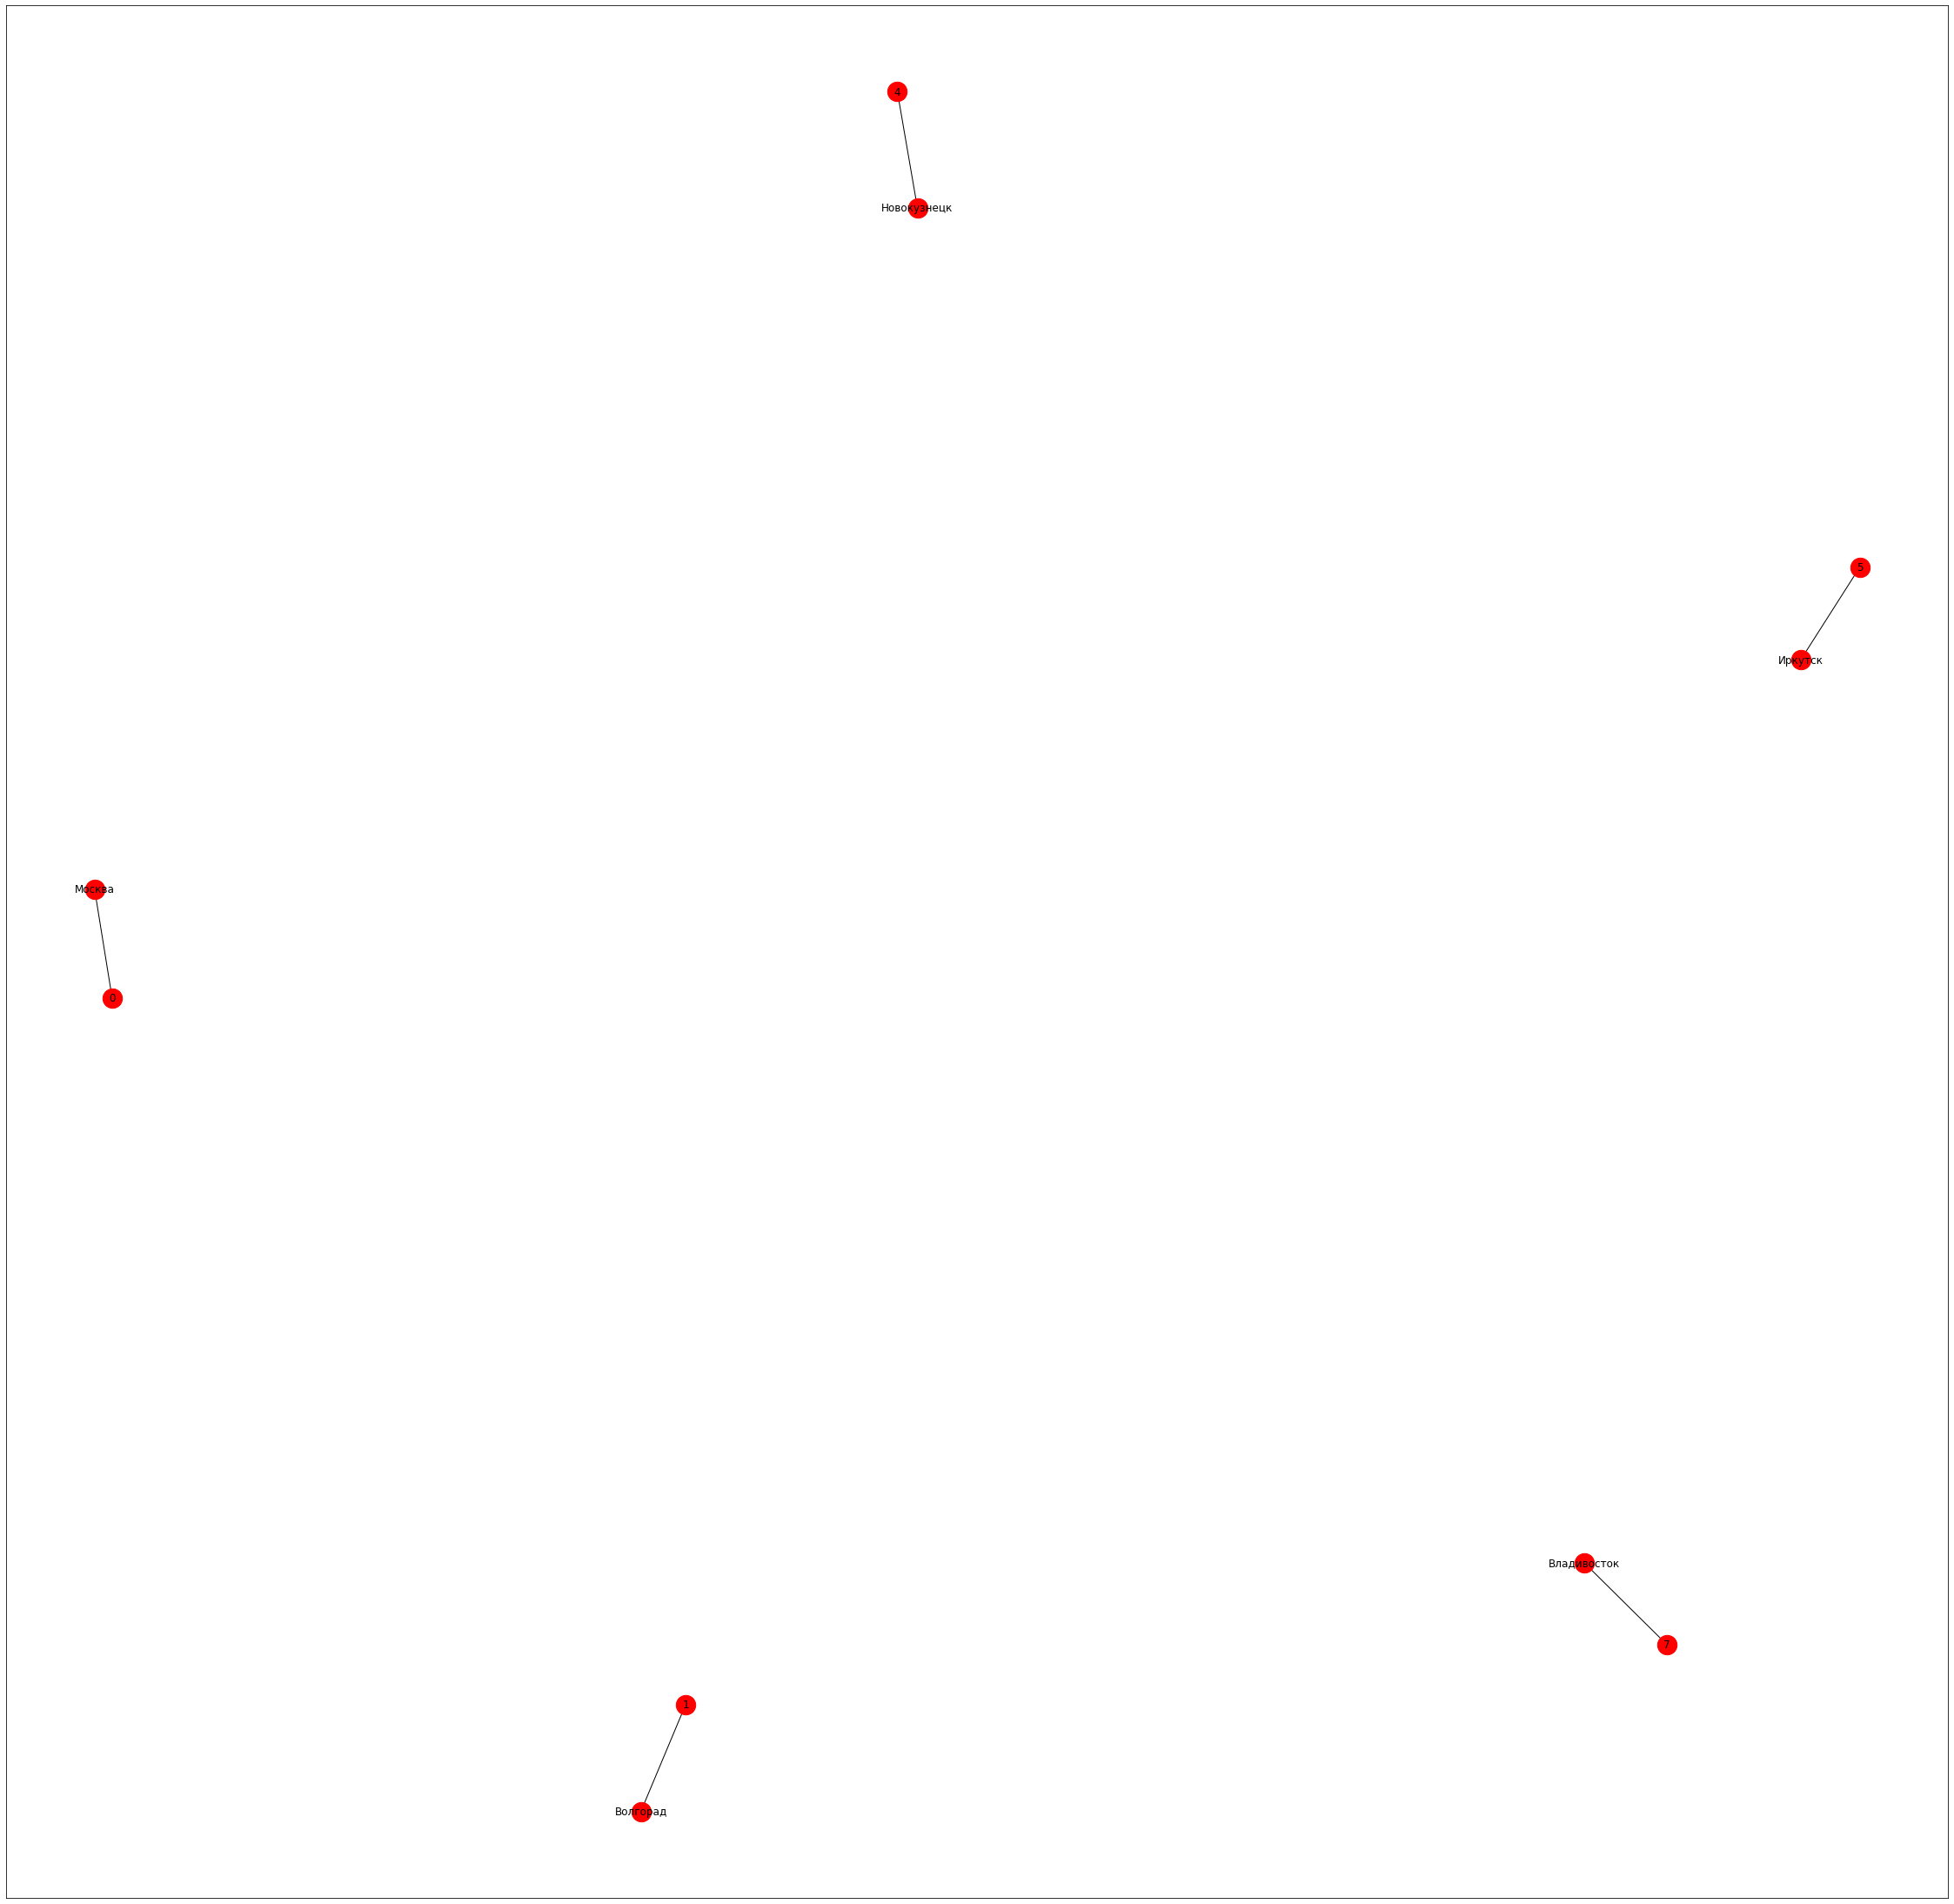

In [2]:
city_list = [{'city': 'Москва', 'time_diff': 0}, 
             {'city': 'Новокузнецк', 'time_diff': 4}, 
             {'city': 'Иркутск', 'time_diff': 5}, 
             {'city': 'Волгорад', 'time_diff': 1}, 
             {'city': 'Владивосток', 'time_diff': 7},]

data = pd.DataFrame(city_list)

fly_graph = nx.from_pandas_edgelist(data, source = 'city', target = 'time_diff')
fly_graph = nx.to_undirected(fly_graph)

plt.figure(figsize=(40, 40)) 
nx.draw_networkx(fly_graph, with_labels=True, node_color='red', node_size=500)

## Задание 3 (1 балл)
Выберите любую пару городов и постройте между ними следующие кратчайшие пути:
- без взвешивания
- со взвешиванием по расстоянию
- со взвешиванием по времени

In [7]:
print(nx.shortest_path(fly_graph, 'Владивосток', 'Иркутск'))
print(nx.shortest_path(fly_graph, 'Владивосток', 'Иркутск', weight='distance'))
print(nx.shortest_path(fly_graph, 'Владивосток', 'Иркутск', weight='time'))

['Владивосток', 'Москва', 'Иркутск']
['Владивосток', 'Москва', 'Иркутск']
['Владивосток', 'Москва', 'Иркутск']


Поясните полученные результаты.